# Test Module 1

### Naive Exact Matching Algorithm Function

In [ ]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

### Reverse Complement Function

In [ ]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

### Parsing a DNA reference genome from a file in the FASTA format

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

### Parsing the read and quality strings from a FASTQ file containing sequencing reads

In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

### Implement the naive_with_rc function


In [ ]:
def naive_with_rc(p, t): 
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record 
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    rev = ''
    pat = ''
    for base in t:
        rev = complement[base] + rev
    for base2 in p:
        pat = complement[base2] + pat        
    for k in range(len(rev) - len(pat) + 1): # loop over alignments
        match1 = True
        for l in range(len(pat)):  # loop over characters
            if rev[k+l] != pat[l]:  # compare characters
                match1 = False
                break                
        if match1:
            occurrences.append(k)  # all chars matched; record 
    return occurrences


#### Example 1
##### (expected result [10, 23])

In [ ]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)
print(t)


[10, 23]
AAAAAAAAAACCCAAAAAAAAAAGGGAAAAAAAAAA


#### Example 2
##### (expected result [10, 24])

In [ ]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)
print(t)

[10, 24, 10, 24]
AAAAAAAAAACGCGAAAAAAAAAACGCGAAAAAAAAAA


#### Example 3

##### Downloading FASTA file

##### Reading FASTA file Function

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

##### Parsing reads from FASTA file

In [ ]:
phix_genome = readGenome('phix.fa')

##### Using the Naive Reverse Complement Function

In [ ]:
occurrences = naive_with_rc('ATTA', phix_genome)

##### Printing the result of the Naive Reverse Complement Function (expected result offset of leftmost occurrence of the pattern: 62)

In [ ]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 62


##### Printing the number of occurences of the pattern (expected result occurrences: 60)

In [ ]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 58


##### Print the List occurences

In [ ]:
print("# positions of the pattern in the genome: %s" % occurrences)

# positions of the pattern in the genome: [62, 82, 103, 341, 440, 639, 707, 710, 823, 997, 1084, 1246, 1336, 1576, 1628, 2168, 2752, 2886, 2895, 3083, 3285, 3566, 3611, 3993, 4017, 4307, 4437, 4457, 4606, 776, 925, 945, 1075, 1365, 1389, 1771, 1816, 2097, 2299, 2487, 2496, 2630, 3214, 3754, 3806, 4046, 4136, 4298, 4385, 4559, 4672, 4675, 4743, 4942, 5041, 5279, 5300, 5320]


### Another Genome

##### Downloading FASTA file

In [ ]:
!wget http://d396qusza40orc.cloudfront.net/ads1/data/lambda_virus.fa

--2022-06-22 23:35:53--  http://d396qusza40orc.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 18.160.201.218, 18.160.201.210, 18.160.201.48, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|18.160.201.218|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.2’

lambda_virus.fa.2   100%[===================>]  48.12K  --.-KB/s    in 0.01s   

2022-06-22 23:35:53 (4.27 MB/s) - ‘lambda_virus.fa.2’ saved [49270/49270]



##### Reading FASTA file Function

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

##### Parsing reads from FASTA file

In [ ]:
lambda_genome = readGenome('lambda_virus.fa')

##### Using the Naive Reverse Complement Function

In [ ]:
occurrences = naive_with_rc('AGTCGA', lambda_genome)

##### Printing the result of the Naive Reverse Complement Function 

In [ ]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 3690


##### Printing the number of occurences of the pattern 

In [ ]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 8


##### Print the List occurences

In [ ]:
print("# positions of the pattern in the genome: %s" % occurrences)

# positions of the pattern in the genome: [18005, 23320, 33657, 44806, 3690, 14839, 25176, 30491]


### Create a Naive function to find approximate matches
#### (Code obtained from the following source:
 https://www.cs.jhu.edu/~langmea/resources/lecture_notes/approximate_matching.pdf)
 #### (Hamming distance is the the number aof mismatches that is acceptable)

In [ ]:
def naive_2mm(p,	t,	maxHammingDistance=2):
				occurrences	=	[]
				for	i	in range(0,	len(t)	- len(p)	+ 1):	#	for	all	alignments
								nmm	= 0
								for	j	in range(0,	len(p)):										#	for	all	characters
												if	t[i+j]	!=	p[j]:															#	does	it	match?
																nmm	+= 1																					#	mismatch
																if	nmm	>	maxHammingDistance:
																				break																				#	exceeded	maximum	distance
								if	nmm	<=	maxHammingDistance:
												#	approximate	match;	return	pair	where	first	element	is	the
												#	offset	of	the	match	and	second	is	the	Hamming	distance
												occurrences.append((i,	nmm))
				return	occurrences



### Example 1
#### (expected result [10, 24, 38])

In [ ]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

[(10, 0), (24, 1), (38, 2)]


### Example 2 (Phix Genome)

In [ ]:
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2022-06-22 22:19:53--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 18.160.201.48, 18.160.201.210, 18.160.201.113, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|18.160.201.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2022-06-22 22:19:53 (721 MB/s) - ‘phix.fa’ saved [5528/5528]



### Read Genome Function

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

### Parsing Phix Genome

In [ ]:
phix_genome = readGenome('phix.fa')

### Running Naive_2mm Function

In [ ]:
occurrences = naive_2mm('GATTACA', phix_genome)

### Print Leftmost occurences

In [ ]:
print("offset of leftmost occurrence:", min(occurrences))

offset of leftmost occurrence: (10, 2)


### Print Number of Occurrences

In [ ]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 79


### Lambda Genome

In [ ]:
occurrences = naive_2mm('TTCAAGCC', lambda_genome)

### Leftmost occurence of the pattern 'TTCAAGCC'

In [ ]:
print("offset of leftmost occurrence:", min(occurrences))

offset of leftmost occurrence: (45, 2)


### Number of occurences of the pattern 'TTCAAGCC'

In [ ]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 191


### Leftmost occurence of 'AGGAGGTT'in the Lambda genome

In [ ]:
occurrences = naive_2mm('AGGAGGTT', lambda_genome)

In [ ]:
print("offset of leftmost occurrence:", min(occurrences))

offset of leftmost occurrence: (49, 2)


### Analysing reads by position

#### Downloading the FASTQ file from the URL link below

In [ ]:
!wget --no-check  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2022-06-22 22:46:48--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.249.139.38, 13.249.139.27, 13.249.139.96, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.249.139.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.05s   

2022-06-22 22:46:49 (4.69 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



### Parsing the sequences and quality strings

In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
          fh.readline()
          seq = fh.readline().rstrip()
          fh.readline()
          qual = fh.readline().rstrip()
          if len(seq) == 0:
              break
          sequences.append(seq)
          qualities.append(qual)
    return sequences, qualities

seqs, quals = readFastq('ERR037900_1.first1000.fastq')

### Print out the first five sequences

In [ ]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC']


### Print out the first five quality strings

In [ ]:
print(quals[:5])

['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########']


### Find the GC content at each position in the DNA sequence or reads

In [ ]:
def findGCByPos(reads):
  gc = [0] * 100
  totals = [0] * 100

  for read in reads:
    for i in range(len(read)):
      if read[i] == 'C' or read[i] == 'G':
          gc[i] += 1
      totals[i] += 1
  
  for i in range(len(gc)):
    if totals[i] > 0:
        gc[i] /= float(totals[i])

  return gc

gc = findGCByPos(seqs)

### Plot GC content at each position in the DNA sequence or reads

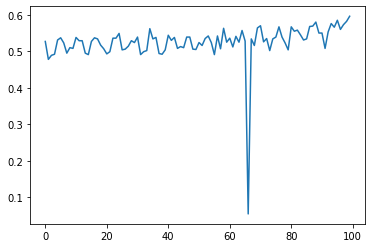

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(range(len(gc)), gc)
plt.show()

### The distribution of nucleotides or bases within these DNA sequences or reads

In [ ]:
import collections
count = collections.Counter()
for seq in seqs:
  count.update(seq)
print(count)

Counter({'C': 29665, 'A': 24057, 'G': 22888, 'T': 22476, 'N': 914})


### Correct Answers http://binf.gmu.edu/swang36/NGS/Project1_Naive_Exact.html